In [1]:
#Libraries first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#lets create a time series data set
dates = pd.date_range(start='2025-01-01', end='2025-09-30', freq='D')

np.random.seed(42)
data = np.random.randn(len(dates))
temperatures = 20 + data *2 


In [7]:
df = pd.DataFrame({'Date': dates, 'Temperature': temperatures})

# Set 'Date' as index
df.set_index('Date', inplace=True)
print(df.head())

            Temperature
Date                   
2025-01-01    20.993428
2025-01-02    19.723471
2025-01-03    21.295377
2025-01-04    23.046060
2025-01-05    19.531693


1️⃣What’s an Index in a DataFrame?
Every pandas DataFrame has an index — it’s like a label for each row.

Example (default numeric index):

In [13]:
import pandas as pd

data = {'Date': ['2023-01-01', '2023-01-02', '2023-01-03'],
        'Sales': [100, 150, 200]}

dff = pd.DataFrame(data)
print(dff)

         Date  Sales
0  2023-01-01    100
1  2023-01-02    150
2  2023-01-03    200


Here, 0, 1, 2 is the index (row labels).
This is a non-time-indexed DataFrame.

2️⃣Time-Indexed DataFrame

If we set the “Date” column as the index — and ensure it’s a datetime type — we get a time-indexed DataFrame:

In [14]:
dff['Date'] = pd.to_datetime(dff['Date'])  # convert string → datetime
dff.set_index('Date', inplace=True)
print(dff)

            Sales
Date             
2023-01-01    100
2023-01-02    150
2023-01-03    200


✅ Now the index itself represents time.

| Feature                           | Non-Time Indexed   | Time-Indexed                       |
| --------------------------------- | ----------------   | ---------------------------------- |
| Index type                        | Integer            | DatetimeIndex                      |
| Sorting                           | Manual             | Automatic chronological            |
| Time-based slicing                | ❌ Not possible   |✅ Yes (e.g. `df['2023-01']`)       |
| Resampling (daily → weekly, etc.) | ❌ Not supported  |✅ Easy (`df.resample('W').mean()`) |
| Rolling windows                   | ✅ but manual     |✅ time-aware (`rolling('7D')`)     |
| Plotting behavior                 | Normal             | Time axis automatically formatted  |


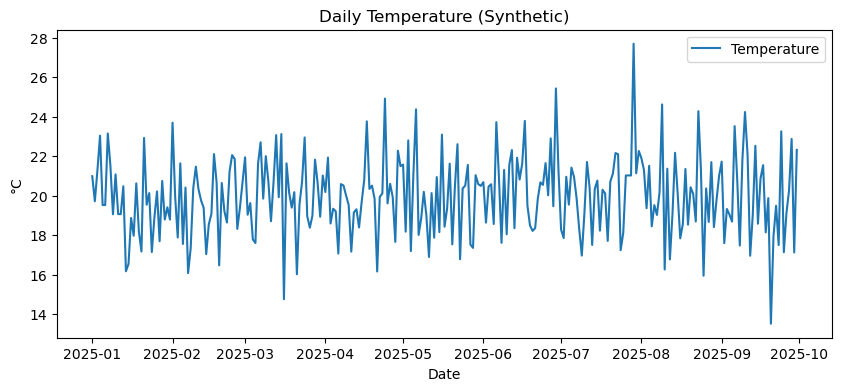

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Temperature'], label='Temperature')
plt.title("Daily Temperature (Synthetic)")
plt.xlabel("Date")
plt.ylabel("°C")
plt.legend()
plt.show()


C:\Users\omsri\AppData\Local\Temp\ipykernel_35308\4187740445.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['Temperature'].resample('M').mean()


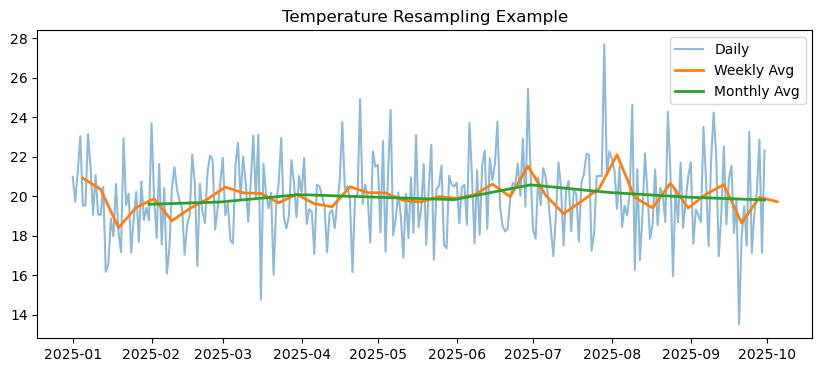

In [10]:
weekly_avg = df['Temperature'].resample('W').mean()
monthly_avg = df['Temperature'].resample('M').mean()

plt.figure(figsize=(10,4))
plt.plot(df['Temperature'], alpha=0.5, label='Daily')
plt.plot(weekly_avg, label='Weekly Avg', linewidth=2)
plt.plot(monthly_avg, label='Monthly Avg', linewidth=2)
plt.legend()
plt.title('Temperature Resampling Example')
plt.show()

Summary

🧾 Non-time-indexed: Just a regular table (dates as column).

⏰ Time-indexed: Dates are the index — enabling time-aware operations (resampling, rolling, slicing).